In [1]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [2]:
data=pd.read_csv('C:/Users/NAMRATA/Downloads/DATA SCIENCE/ASSIGNMENT/Neural Networks/forestfires.csv')
data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [3]:
data['size_category'] = data['size_category'].map({'large': 1, 'small': 0})
data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,0
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,0
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,0
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,0
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,1
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,1
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,1
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data2=data.drop(['month', 'day'],1)
data2

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,1,0,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,1,0,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,1
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,1
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,1
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# split into input (X) and output (Y) variables
x = data2.iloc[:,0:28]
y = data2.iloc[:,28]

Model Building

In [6]:
# create model with 3 Hidden layers

In [7]:
model = Sequential()
model.add(Dense(12, input_dim=28,kernel_initializer='uniform', activation='relu'))
model.add(Dense(8, kernel_initializer='uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

In [8]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [9]:
# Fit the model with no.of epochs =150 and batch_size= 10

In [10]:
m=model.fit(x, y, validation_split=0.33, epochs=150, batch_size=10)

Epoch 1/150
35/35 [==============================] - 13s 16ms/step - loss: 0.6396 - accuracy: 0.7378 - val_loss: 0.6945 - val_accuracy: 0.6784
Epoch 2/150
35/35 [==============================] - 0s 1ms/step - loss: 0.5385 - accuracy: 0.7716 - val_loss: 0.6261 - val_accuracy: 0.6784
Epoch 3/150
35/35 [==============================] - 0s 2ms/step - loss: 0.5270 - accuracy: 0.7834 - val_loss: 0.6058 - val_accuracy: 0.6901
Epoch 4/150
35/35 [==============================] - 0s 2ms/step - loss: 0.5348 - accuracy: 0.7606 - val_loss: 0.5945 - val_accuracy: 0.7018
Epoch 5/150
35/35 [==============================] - 0s 2ms/step - loss: 0.5276 - accuracy: 0.7471 - val_loss: 0.6324 - val_accuracy: 0.7076
Epoch 6/150
35/35 [==============================] - 0s 2ms/step - loss: 0.4861 - accuracy: 0.7803 - val_loss: 0.4914 - val_accuracy: 0.7661
Epoch 7/150
35/35 [==============================] - 0s 2ms/step - loss: 0.4502 - accuracy: 0.7934 - val_loss: 0.4905 - val_accuracy: 0.7719
Epoch 8/150

Epoch 59/150
35/35 [==============================] - 0s 2ms/step - loss: 0.0189 - accuracy: 0.9959 - val_loss: 0.0594 - val_accuracy: 0.9708
Epoch 60/150
35/35 [==============================] - 0s 2ms/step - loss: 0.0184 - accuracy: 0.9948 - val_loss: 0.0558 - val_accuracy: 0.9708
Epoch 61/150
35/35 [==============================] - 0s 2ms/step - loss: 0.0162 - accuracy: 0.9927 - val_loss: 0.3096 - val_accuracy: 0.9064
Epoch 62/150
35/35 [==============================] - 0s 1ms/step - loss: 0.0425 - accuracy: 0.9803 - val_loss: 0.2518 - val_accuracy: 0.9123
Epoch 63/150
35/35 [==============================] - 0s 1ms/step - loss: 0.0381 - accuracy: 0.9878 - val_loss: 0.0706 - val_accuracy: 0.9766
Epoch 64/150
35/35 [==============================] - 0s 1ms/step - loss: 0.0163 - accuracy: 0.9979 - val_loss: 0.0612 - val_accuracy: 0.9766
Epoch 65/150
35/35 [==============================] - 0s 1ms/step - loss: 0.0176 - accuracy: 0.9939 - val_loss: 0.1221 - val_accuracy: 0.9532
Epoch 

35/35 [==============================] - 0s 2ms/step - loss: 0.0074 - accuracy: 0.9998 - val_loss: 0.0709 - val_accuracy: 0.9708
Epoch 117/150
35/35 [==============================] - 0s 2ms/step - loss: 0.0491 - accuracy: 0.9823 - val_loss: 0.1331 - val_accuracy: 0.9532
Epoch 118/150
35/35 [==============================] - 0s 2ms/step - loss: 0.0327 - accuracy: 0.9892 - val_loss: 0.0666 - val_accuracy: 0.9825
Epoch 119/150
35/35 [==============================] - 0s 2ms/step - loss: 0.0168 - accuracy: 0.9960 - val_loss: 0.0634 - val_accuracy: 0.9766
Epoch 120/150
35/35 [==============================] - 0s 2ms/step - loss: 0.0076 - accuracy: 0.9994 - val_loss: 0.0913 - val_accuracy: 0.9649
Epoch 121/150
35/35 [==============================] - 0s 2ms/step - loss: 0.0305 - accuracy: 0.9922 - val_loss: 0.0659 - val_accuracy: 0.9708
Epoch 122/150
35/35 [==============================] - 0s 2ms/step - loss: 0.0080 - accuracy: 0.9991 - val_loss: 0.1227 - val_accuracy: 0.9591
Epoch 123/150

In [11]:
# evaluating the model and finding best accuracy

In [12]:
scores = model.evaluate(x, y)
(model.metrics_names[1], scores[1]*100)

17/17 [==============================] - 0s 1000us/step - loss: 0.1100 - accuracy: 0.9632


('accuracy', 96.32495045661926)

We got accuracy of 98.6% (best accuracy) with 150 epochs and batch_size as 10.So, there is no need of tuning parameters for getting better accuracy.

In [13]:
m.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [14]:
# Model accuracy with different no.of epochs

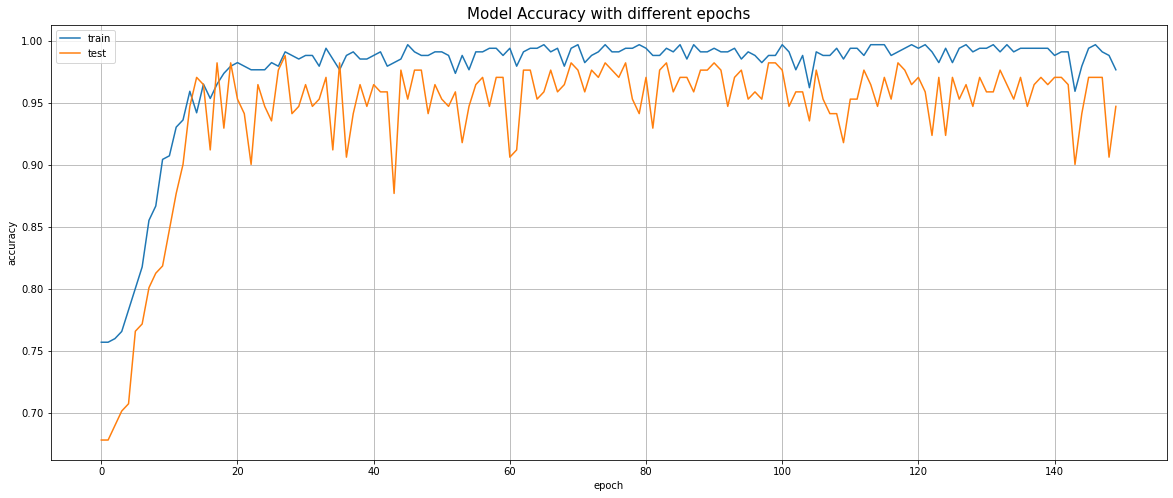

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=[20,8])
plt.plot(m.history['accuracy'])
plt.plot(m.history['val_accuracy'])
plt.title('Model Accuracy with different epochs',fontsize=15)
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid()
plt.show()

In the above graph we can see after 40 epochs there is no big difference between train and test accuracy .So, we can use any epoch size >40 for better accuracy and better model